In [287]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv
/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_critic_reviews.csv


In [288]:
df=pd.read_csv('/kaggle/input/rotten-tomatoes-movies-and-critic-reviews-dataset/rotten_tomatoes_movies.csv')

In [289]:
df.tail()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1
17711,m/zulu_dawn,Zulu Dawn,Sir Henry Bartle Frere's (John Mills) vastly o...,NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,...,Tango Entertainment,Rotten,50.0,8.0,Upright,62.0,4469.0,0,4,4


In [290]:
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [292]:
a=df.duplicated()
a.value_counts()

False    17712
Name: count, dtype: int64

In [293]:
from sklearn.preprocessing import LabelEncoder

In [294]:
df['rotten_tomatoes']=df["tomatometer_status"]

In [295]:
le=LabelEncoder()
df['rotten_tomatoes']=le.fit_transform(df["rotten_tomatoes"])

In [296]:
df.sample(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,rotten_tomatoes
3911,m/bottle_shock,Bottle Shock,Paris-based wine expert Steven Spurrier heads ...,Bottle Shock fails to properly utilize the ins...,PG-13,"Comedy, Drama",Randall Miller,"Randall Miller, Jody Savin, Ross Schwartz","Alan Rickman, Bill Pullman, Chris Pine, Rachae...",2008-01-18,...,Rotten,48.0,124.0,Spilled,58.0,18874.0,38,60,64,2
6360,m/fear_no_evil_1981,Fear No Evil,"A teenage boy (Stefan Arngrim), an old woman (...",NaN,R,"Horror, Mystery & Suspense",Frank LaLoggia,Frank LaLoggia,"Stefan Arngrim, Elizabeth Hoffman, Kathleen Ro...",1981-06-24,...,Rotten,56.0,9.0,Spilled,26.0,1630.0,2,5,4,2
5052,m/curious_case_of_benjamin_button,The Curious Case of Benjamin Button,"Born under unusual circumstances, Benjamin But...",Curious Case of Benjamin Button is an epic fan...,PG-13,"Drama, Science Fiction & Fantasy, Romance",David Fincher,"Eric Roth, Robin Swicord","Brad Pitt, Cate Blanchett, Jason Flemyng, Juli...",2008-12-25,...,Certified-Fresh,72.0,254.0,Upright,80.0,690720.0,55,182,72,0
15688,m/the_raid_2,The Raid 2,After surviving a bloody fight with powerful g...,Although its high-energy plot and over-the-top...,R,Action & Adventure,Gareth Evans,Gareth Evans,"Iko Uwais, Yahan Ruhian, Arifin Putra, Oka Ant...",2014-03-28,...,Certified-Fresh,81.0,176.0,Upright,87.0,24253.0,40,142,34,0
13511,m/solarbabies,Solarbabies,In a sun-scorched post-apocalyptic world large...,NaN,PG-13,"Action & Adventure, Science Fiction & Fantasy",Alan Johnson,"Walon Green, Douglas Anthony Metrov, Chris Col...","Richard Jordan, Jami Gertz, Lukas Haas, Jason ...",1986-11-26,...,Rotten,0.0,9.0,Spilled,43.0,3635.0,2,0,9,2


In [297]:
import seaborn as sns

In [298]:
# sns.pairplot(df,hue="rotten_tomatoes")

In [299]:
df.isnull().sum()


rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
rotten_tomatoes                        0
dtype: int64

In [300]:
df

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,rotten_tomatoes
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,0
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,1
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4,2
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7,0
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2,1
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1,1


Dropping the text columns


In [301]:
df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'rotten_tomatoes'],
      dtype='object')

In [302]:
a=["runtime","tomatometer_rating","tomatometer_count","audience_rating","audience_count","tomatometer_top_critics_count","tomatometer_fresh_critics_count","tomatometer_rotten_critics_count","rotten_tomatoes"]
df1=df[a]

In [303]:
df1

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,rotten_tomatoes
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,2
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,1
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1
...,...,...,...,...,...,...,...,...,...
17707,104.0,56.0,9.0,74.0,1195.0,2,5,4,2
17708,108.0,98.0,291.0,92.0,101511.0,50,285,7,0
17709,142.0,80.0,10.0,86.0,7146.0,0,8,2,1
17710,135.0,96.0,23.0,91.0,30193.0,6,22,1,1


In [304]:
df1=df1.dropna()

In [305]:
y=df1["rotten_tomatoes"]

In [306]:
X=df1.iloc[:,:-1]

In [307]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [308]:
scaler.fit_transform(X)


array([[ 0.89195897, -0.40725947,  1.31791315, ...,  1.84638165,
         0.67571814,  1.79629626],
       [-0.66256687,  0.93015571,  1.21622305, ...,  1.91205322,
         1.61705153, -0.07152325],
       [ 1.05277198,  0.22625298, -0.49798165, ..., -0.84615259,
        -0.39740192, -0.43197964],
       ...,
       [ 2.12485876,  0.68378975, -0.70136187, ..., -0.97749572,
        -0.54801526, -0.62859222],
       [ 1.74962839,  1.24691193, -0.51250881, ..., -0.58346632,
        -0.28444191, -0.66136098],
       [ 0.99916764, -0.37206433, -0.73041618, ..., -0.97749572,
        -0.62332193, -0.56305469]])

In [309]:
from sklearn.decomposition import PCA
pca=PCA(0.95)

In [310]:
X.isna().sum()

runtime                             0
tomatometer_rating                  0
tomatometer_count                   0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
dtype: int64

In [311]:
pca.fit_transform(X)

array([[ 108521.37894694],
       [-134325.62098915],
       [-131215.62199926],
       ...,
       [-138753.62208252],
       [-115706.62196362],
       [-141430.62213059]])

In [312]:
X.shape

(17168, 8)

In [313]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#Created a dictionary for all the Classification algorithms
classifiers = {
    'Knearest_neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Perform 5-fold cross-validation for each classifier
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X, y, cv=5)
    mean_score = np.mean(scores)
    print(f'{name}: Mean Cross-Validation Score = {mean_score}')

# Identify the best algorithm based on the mean scores
best_algorithm = max(classifiers, key=lambda x: np.mean(cross_val_score(classifiers[x], X, y, cv=5)))
print(f'The best algorithm is {best_algorithm}')


Knearest_neighbors: Mean Cross-Validation Score = 0.7713771793553305
Random Forest: Mean Cross-Validation Score = 0.9921947061826348
SVM: Mean Cross-Validation Score = 0.433480889940573
The best algorithm is Random Forest


In [335]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [336]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [339]:

clf.score(X_test,y_test)

0.9903902154921375

In [342]:
y_pred=clf.predict(X_test)


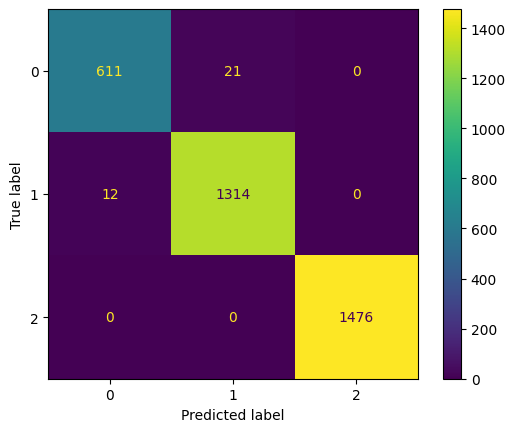

In [346]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib as plt
# confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
